## _Imports:_

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## _Functions:_

In [60]:
#convert to snake case with iteration over columns using list comp
def columns_to_snake_case(df):
    df.columns = [column.replace(' ', '_').lower() for column in df.columns]
    return df

In [22]:
def plot_column_distributions(dataframe, nrows=4, ncols=3, figsize=(18, 15)):
    plt.figure(figsize=figsize)

    for i, col in enumerate(dataframe.columns[:nrows*ncols], 1):
        plt.subplot(nrows, ncols, i)
        plt.title(f"Distribution of {col} Data")
        sns.histplot(dataframe[col], kde=True)
        plt.tight_layout()
        plt.plot()
    
    plt.show()

In [23]:
def plot_boxplots(dataframe):
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))
    axs = axes.flatten()

    for i, var in enumerate(dataframe.columns):
        sns.boxplot(x=var, data=dataframe, ax=axs[i], color= 'lightskyblue')
        axs[i].set_title(f"{var}")

    fig.tight_layout()
    plt.show()

## _Initial Review:_

In [59]:
arena = pd.read_excel('../Arena_Labs/data/StriveDatabase_D_ID.xlsx')

In [61]:
columns_to_snake_case(arena)

auth_user_id    id  team_id               device_date  recovery_score  \
0             1055  1048       95  2023-04-19T09:38:51.841Z              22   
1             1055  1048       95  2023-04-18T18:47:00.099Z              50   
2             1056  1049       95   2023-06-15T10:20:44.93Z              52   
3             1056  1049       95  2023-06-14T09:22:08.356Z              32   
4             1056  1049       95  2023-06-13T09:38:18.154Z              96   
...            ...   ...      ...                       ...             ...   
5433          1192  1183       99  2023-05-05T10:45:32.922Z              69   
5434          1192  1183       99  2023-05-04T11:05:39.416Z              59   
5435          1192  1183       99  2023-05-03T11:46:03.914Z              49   
5436          1192  1183       99  2023-05-02T10:40:18.785Z              82   
5437          1192  1183       99  2023-05-01T11:50:59.377Z              53   

      hrv_rmssd  resting_heart_rate  sleep_performance_score  \
0     14.740724                  75                       84   
1     40.321194                 120                      100   
2     28.036976                  64                       72   
3     21.550380                  67                       70   
4     54.167790                  55                       85   
...         ...                 ...                      ...   
5433  40.271362                  66                       93   
5434  35.044952                  66                       94   
5435  30.246056                  66                      100   
5436  52.247463                  66                       60   
5437  32.375916                  75                       80   

      in_sleep_efficiency  rem_sleep_percent  ...  total_time_asleep  \
0                0.836381              7.508  ...           6.344888   
1                0.980510              0.000  ...          12.857864   
2                0.911056             32.362  ...           6.232846   
3                0.898349             16.380  ...           5.807417   
4                0.957279             19.788  ...           7.500001   
...                   ...                ...  ...                ...   
5433             0.960996             23.182  ...           7.267399   
5434             0.930443             25.312  ...           7.267349   
5435             0.974144             23.191  ...           8.342313   
5436             0.891837             23.769  ...           4.965138   
5437             0.936212             36.803  ...           6.922480   

      total_restorative_sleep  timeframe  date_actual  dow  hrv_%_change  \
0                    1.796866          0   2023-04-19  Wed     -0.634417   
1                    0.000000   Baseline   2023-04-18  Tue      0.464576   
2                    3.730083        +30   2023-06-15  Thu     -0.209415   
3                    2.438592        +30   2023-06-14  Wed     -0.392324   
4                    2.679240        +30   2023-06-13  Tue      0.527420   
...                       ...        ...          ...  ...           ...   
5433                 3.465379   Baseline   2023-05-05  Fri      0.139796   
5434                 4.459786   Baseline   2023-05-04  Thu     -0.008127   
5435                 4.187054   Baseline   2023-05-03  Wed     -0.143949   
5436                 2.157555   Baseline   2023-05-02  Tue      0.478754   
5437                 4.596457        NaN   2023-05-01  Mon     -0.083668   

      rhr_%_change  tib_%_change tta%_change trs%_change  
0        -0.375000     -0.421501   -0.506536         NaN  
1         0.230769      0.267026    0.339169   -1.000000  
2         0.053498     -0.074058   -0.095165    0.183736  
3         0.102881     -0.125055   -0.156925   -0.226116  
4        -0.094650      0.086375    0.088791   -0.149747  
...            ...           ...         ...         ...  
5433     -0.035955      0.017614    0.051138   -0.036342  
5434     -0.035955      0.055255    0.

In [5]:
arena.tail()

auth_user_id    id  team_id               device_date  recovery_score  \
5433          1192  1183       99  2023-05-05T10:45:32.922Z              69   
5434          1192  1183       99  2023-05-04T11:05:39.416Z              59   
5435          1192  1183       99  2023-05-03T11:46:03.914Z              49   
5436          1192  1183       99  2023-05-02T10:40:18.785Z              82   
5437          1192  1183       99  2023-05-01T11:50:59.377Z              53   

      hrv_rmssd  resting_heart_rate  sleep_performance_score  \
5433  40.271362                  66                       93   
5434  35.044952                  66                       94   
5435  30.246056                  66                      100   
5436  52.247463                  66                       60   
5437  32.375916                  75                       80   

      in_sleep_efficiency  rem_sleep_percent  ...  Total Time Asleep  \
5433             0.960996             23.182  ...           7.267399   
5434             0.930443             25.312  ...           7.267349   
5435             0.974144             23.191  ...           8.342313   
5436             0.891837             23.769  ...           4.965138   
5437             0.936212             36.803  ...           6.922480   

      Total Restorative Sleep  Timeframe  Date Actual  DoW  HRV % Change  \
5433                 3.465379   Baseline   2023-05-05  Fri      0.139796   
5434                 4.459786   Baseline   2023-05-04  Thu     -0.008127   
5435                 4.187054   Baseline   2023-05-03  Wed     -0.143949   
5436                 2.157555   Baseline   2023-05-02  Tue      0.478754   
5437                 4.596457        NaN   2023-05-01  Mon     -0.083668   

      RHR % Change  TIB % Change TTA% Change TRS% Change  
5433     -0.035955      0.017614    0.051138   -0.036342  
5434     -0.035955      0.055255    0.051130    0.240184  
5435     -0.035955      0.156384    0.206610    0.164343  
5436     -0.035955     -0.252403   -0.281855   -0.400024  
5437      0.095506      0.006856    0.001249    0.278190  

[5 rows x 26 columns]

In [62]:
arena.shape

(5438, 26)

In [63]:
#decided I didn't need these columns
arena = arena.drop(columns = ['id','device_date','split'])

In [64]:
arena.describe()

auth_user_id      team_id  recovery_score    hrv_rmssd  \
count   5438.000000  5438.000000     5438.000000  5438.000000   
mean     969.454763    96.721405       58.242552    43.816630   
std      128.710871     1.393179       22.240609    23.437805   
min      814.000000    95.000000        1.000000     5.881657   
25%      856.500000    95.000000       42.000000    28.528881   
50%      887.000000    97.000000       58.000000    37.893768   
75%     1088.000000    98.000000       76.000000    51.047560   
max     1192.000000    99.000000       99.000000   184.895280   

       resting_heart_rate  sleep_performance_score  in_sleep_efficiency  \
count         5438.000000              5438.000000          5438.000000   
mean            62.277860                77.882126             0.895501   
std              9.657222                17.856536             0.067166   
min             36.000000                 1.000000             0.016043   
25%             56.000000                67.000000             0.865147   
50%             62.000000                79.000000             0.908621   
75%             68.000000                93.000000             0.941004   
max            120.000000               100.000000             1.000000   

       rem_sleep_percent  slow_wave_sleep_percent  total_time_in_bed_(hrs)  \
count        5438.000000              5438.000000              5438.000000   
mean           20.365776                17.851874                 7.608912   
std             8.389609                 5.155825                 1.780259   
min             0.000000                 0.000000                 0.601031   
25%            14.618750                14.778000                 6.656796   
50%            20.260000                18.052000                 7.570070   
75%            25.996750                21.330750                 8.618927   
max            48.615000                35.658000                19.916667   

       rem_sleep_duration_(hrs)  slow_wave_sleep_duration_(hrs)  \
count               5438.000000                     5438.000000   
mean                   1.550262                        1.348463   
std                    0.724867                        0.460083   
min                    0.000000                        0.000000   
25%                    1.034803                        1.058864   
50%                    1.515815                        1.363682   
75%                    2.013442                        1.652464   
max                    5.622932                        2.911876   

       light_sleep_duration_(hrs)  total_time_asleep  total_restorative_sleep  \
count                 5438.000000        5438.000000              5438.000000   
mean                     3.846249           6.744974                 2.898724   
std                      1.254335           1.593011                 1.010793   
min                      0.112302           0.112302                 0.000000   
25%                      3.047957           5.879621                 2.246053   
50%                      3.777336           6.761997                 2.863751   
75%                      4.548023           7.660424                 3.540350   
max                     14.149353          14.277966                 8.101647   

       hrv_%_change  rhr_%_change  tib_%_change  tta%_change  trs%_change  
count   5199.000000   5199.000000   5199.000000  5199.000000  5197.000000  
mean       0.032878     -0.006013     -0.013275    -0.017130    -0.010652  
std        0.268438      0.094314      0.221456     0.217412     0.313143  
min       -0.805839     -0.385199     -0.918691    -0.986035    -1.000000  
25%       -0.131789     -0.056019     -0.131034    -0.134466    -0.203652  
50%        0.009146     -0.011765     -0.014447    -0.016412    -0.021376  
75%        0.155334      0.036212      0.106415     0.100425     0.171024  
max        2.378384      1.352941      1.855573     1.016638     1.592354

In [65]:
arena.dtypes

auth_user_id                               int64
team_id                                    int64
recovery_score                             int64
hrv_rmssd                                float64
resting_heart_rate                         int64
sleep_performance_score                    int64
in_sleep_efficiency                      float64
rem_sleep_percent                        float64
slow_wave_sleep_percent                  float64
total_time_in_bed_(hrs)                  float64
rem_sleep_duration_(hrs)                 float64
slow_wave_sleep_duration_(hrs)           float64
light_sleep_duration_(hrs)               float64
total_time_asleep                        float64
total_restorative_sleep                  float64
timeframe                                 object
date_actual                       datetime64[ns]
dow                                       object
hrv_%_change                             float64
rhr_%_change                             float64
tib_%_change        

In [66]:
arena.isnull().sum()

auth_user_id                         0
team_id                              0
recovery_score                       0
hrv_rmssd                            0
resting_heart_rate                   0
sleep_performance_score              0
in_sleep_efficiency                  0
rem_sleep_percent                    0
slow_wave_sleep_percent              0
total_time_in_bed_(hrs)              0
rem_sleep_duration_(hrs)             0
slow_wave_sleep_duration_(hrs)       0
light_sleep_duration_(hrs)           0
total_time_asleep                    0
total_restorative_sleep              0
timeframe                         1532
date_actual                          0
dow                                  0
hrv_%_change                       239
rhr_%_change                       239
tib_%_change                       239
tta%_change                        239
trs%_change                        241
dtype: int64

Will deal with the missing values later, after I split the data into the specific cohorts.

In [69]:
#how many teams are we working with and their numbers
value_counts = arena.team_id.value_counts()

# Display the count of unique values and their respective values
print("Number of unique values:", arena.team_id.nunique())
print("Unique values:")
for value, count in value_counts.items():
    print(value)

Number of unique values: 4
Unique values:
95
97
98
99


In [68]:
#checking how many unique users there are for the whole dataset
value_counts = arena.auth_user_id.value_counts()

# Display the count of unique values and their respective values
print("Number of unique values:", arena.auth_user_id.nunique())


Number of unique values: 130


In [95]:
#splitting dataframes by team id

a_95 = arena[arena['team_id'] == 95]

a_97 = arena[arena['team_id'] == 97]

a_98 = arena[arena['team_id'] == 98]

a_99 = arena[arena['team_id'] == 99]


In [96]:
a_95.shape

(1891, 23)

In [97]:
a_97.shape

(1852, 23)

In [98]:
a_98.shape

(1123, 23)

In [99]:
a_99.shape

(572, 23)

In [100]:
#will drop team id since the query is complete.
a_95= a_95.drop(columns= 'team_id')
a_97= a_97.drop(columns= 'team_id')
a_98= a_98.drop(columns= 'team_id')
a_99= a_99.drop(columns= 'team_id')

In [145]:
#Exporting WHOOP data for modeling
arena.to_csv('../Arena_Labs/data/arena')

 ## _EDA (per team):_

## _95:_

In [101]:
a_95.describe()

auth_user_id  recovery_score    hrv_rmssd  resting_heart_rate  \
count   1891.000000     1891.000000  1891.000000         1891.000000   
mean    1084.218403       58.378636    44.589858           60.965098   
std       16.767422       21.917654    20.447645            9.858783   
min     1055.000000        1.000000     5.881657           36.000000   
25%     1070.000000       42.000000    31.105674           55.000000   
50%     1082.000000       58.000000    39.602787           60.000000   
75%     1097.000000       76.000000    52.629013           66.000000   
max     1115.000000       99.000000   135.489140          120.000000   

       sleep_performance_score  in_sleep_efficiency  rem_sleep_percent  \
count              1891.000000          1891.000000        1891.000000   
mean                 76.040719             0.893909          19.783705   
std                  17.551675             0.070350           8.222359   
min                   3.000000             0.037079           0.000000   
25%                  65.000000             0.862896          14.178000   
50%                  77.000000             0.910162          19.662000   
75%                  89.000000             0.941113          25.114000   
max                 100.000000             1.000000          47.248000   

       slow_wave_sleep_percent  total_time_in_bed_(hrs)  \
count              1891.000000              1891.000000   
mean                 16.757214                 7.519102   
std                   5.289124                 1.716949   
min                   0.000000                 1.037679   
25%                  13.583000                 6.624808   
50%                  16.782000                 7.481951   
75%                  20.214500                 8.459451   
max                  35.658000                16.217969   

       rem_sleep_duration_(hrs)  slow_wave_sleep_duration_(hrs)  \
count               1891.000000                     1891.000000   
mean                   1.494525                        1.255377   
std                    0.703875                        0.462907   
min                    0.000000                        0.000000   
25%                    0.994694                        0.962601   
50%                    1.467971                        1.251384   
75%                    1.953147                        1.532152   
max                    4.058706                        2.911876   

       light_sleep_duration_(hrs)  total_time_asleep  total_restorative_sleep  \
count                 1891.000000        1891.000000              1891.000000   
mean                     3.901965           6.651867                 2.749902   
std                      1.197821           1.569206                 0.979202   
min                      0.136368           0.253477                 0.000000   
25%                      3.176590           5.815450                 2.117719   
50%                      3.874192           6.625622                 2.703313   
75%                      4.620222           7.556178                 3.369098   
max                     13.668933          13.668933                 6.328847   

       hrv_%_change  rhr_%_change  tib_%_change  tta%_change  trs%_change  
count   1891.000000   1891.000000   1891.000000  1891.000000  1889.000000  
mean       0.019904     -0.003608     -0.008951    -0.017334     0.001184  
std        0.256861      0.098612      0.224124     0.216397     0.337480  
min       -0.758829     -0.385199     -0.874103    -0.956830    -1.000000  
25%       -0.133196     -0.053140     -0.130310    -0.132961    -0.212120  
50%       -0.004521     -0.010687     -0.017911    -0.019638    -0.013813  
75%        0.135844      0.037037      0.111513     0.102359     0.204794  
max        1.987099      1.352941      1.225414     0.914371     1.592354

In [162]:
a_95.auth_user_id.nunique()

55

In [102]:
a_95.isnull().sum()

auth_user_id                        0
recovery_score                      0
hrv_rmssd                           0
resting_heart_rate                  0
sleep_performance_score             0
in_sleep_efficiency                 0
rem_sleep_percent                   0
slow_wave_sleep_percent             0
total_time_in_bed_(hrs)             0
rem_sleep_duration_(hrs)            0
slow_wave_sleep_duration_(hrs)      0
light_sleep_duration_(hrs)          0
total_time_asleep                   0
total_restorative_sleep             0
timeframe                         582
date_actual                         0
dow                                 0
hrv_%_change                        0
rhr_%_change                        0
tib_%_change                        0
tta%_change                         0
trs%_change                         2
dtype: int64

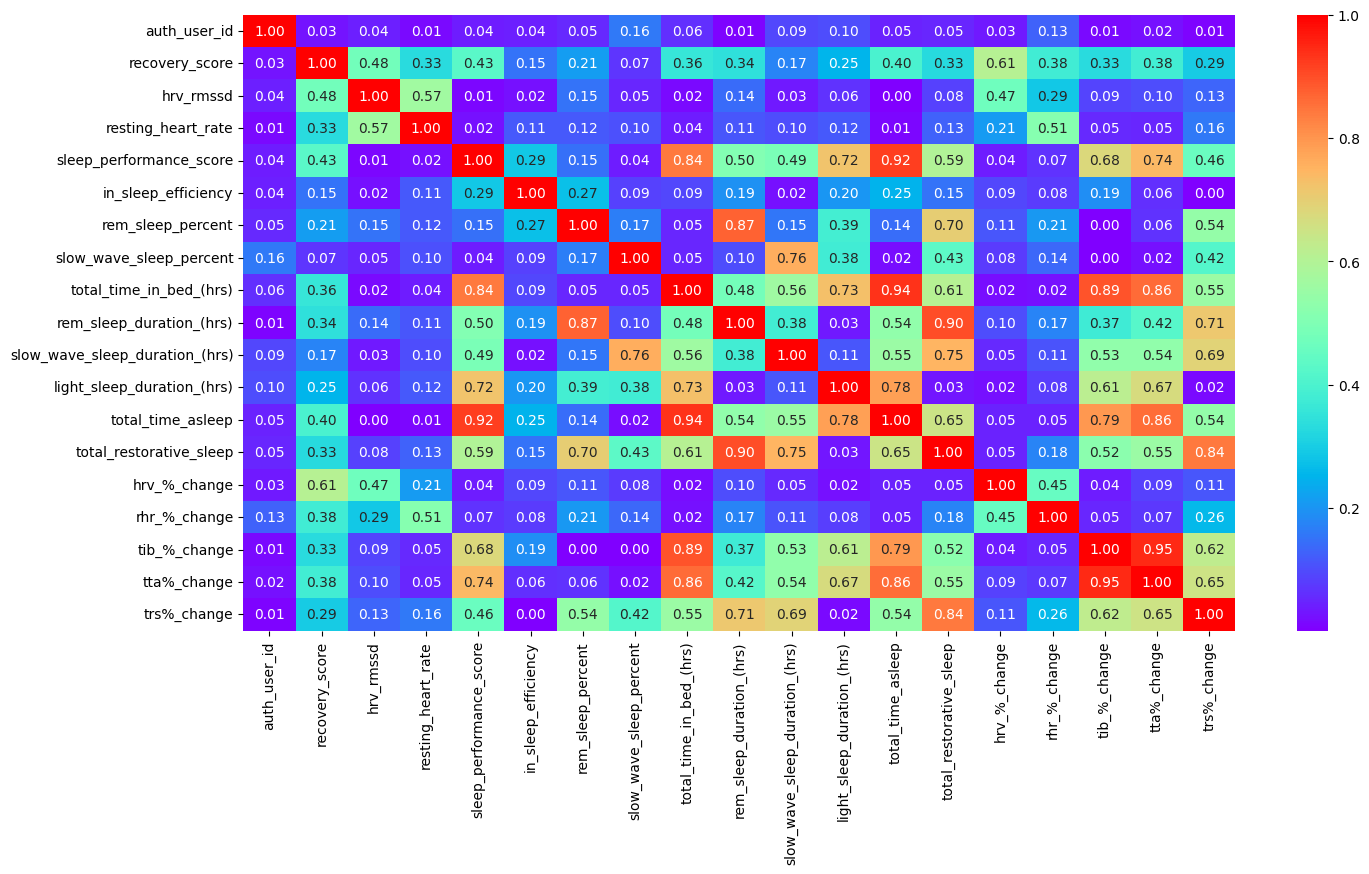

In [107]:
plt.figure(figsize=(16,8))
sns.heatmap(np.abs(a_95.corr()),annot=True,cmap='rainbow', fmt="0.2f")
plt.show()

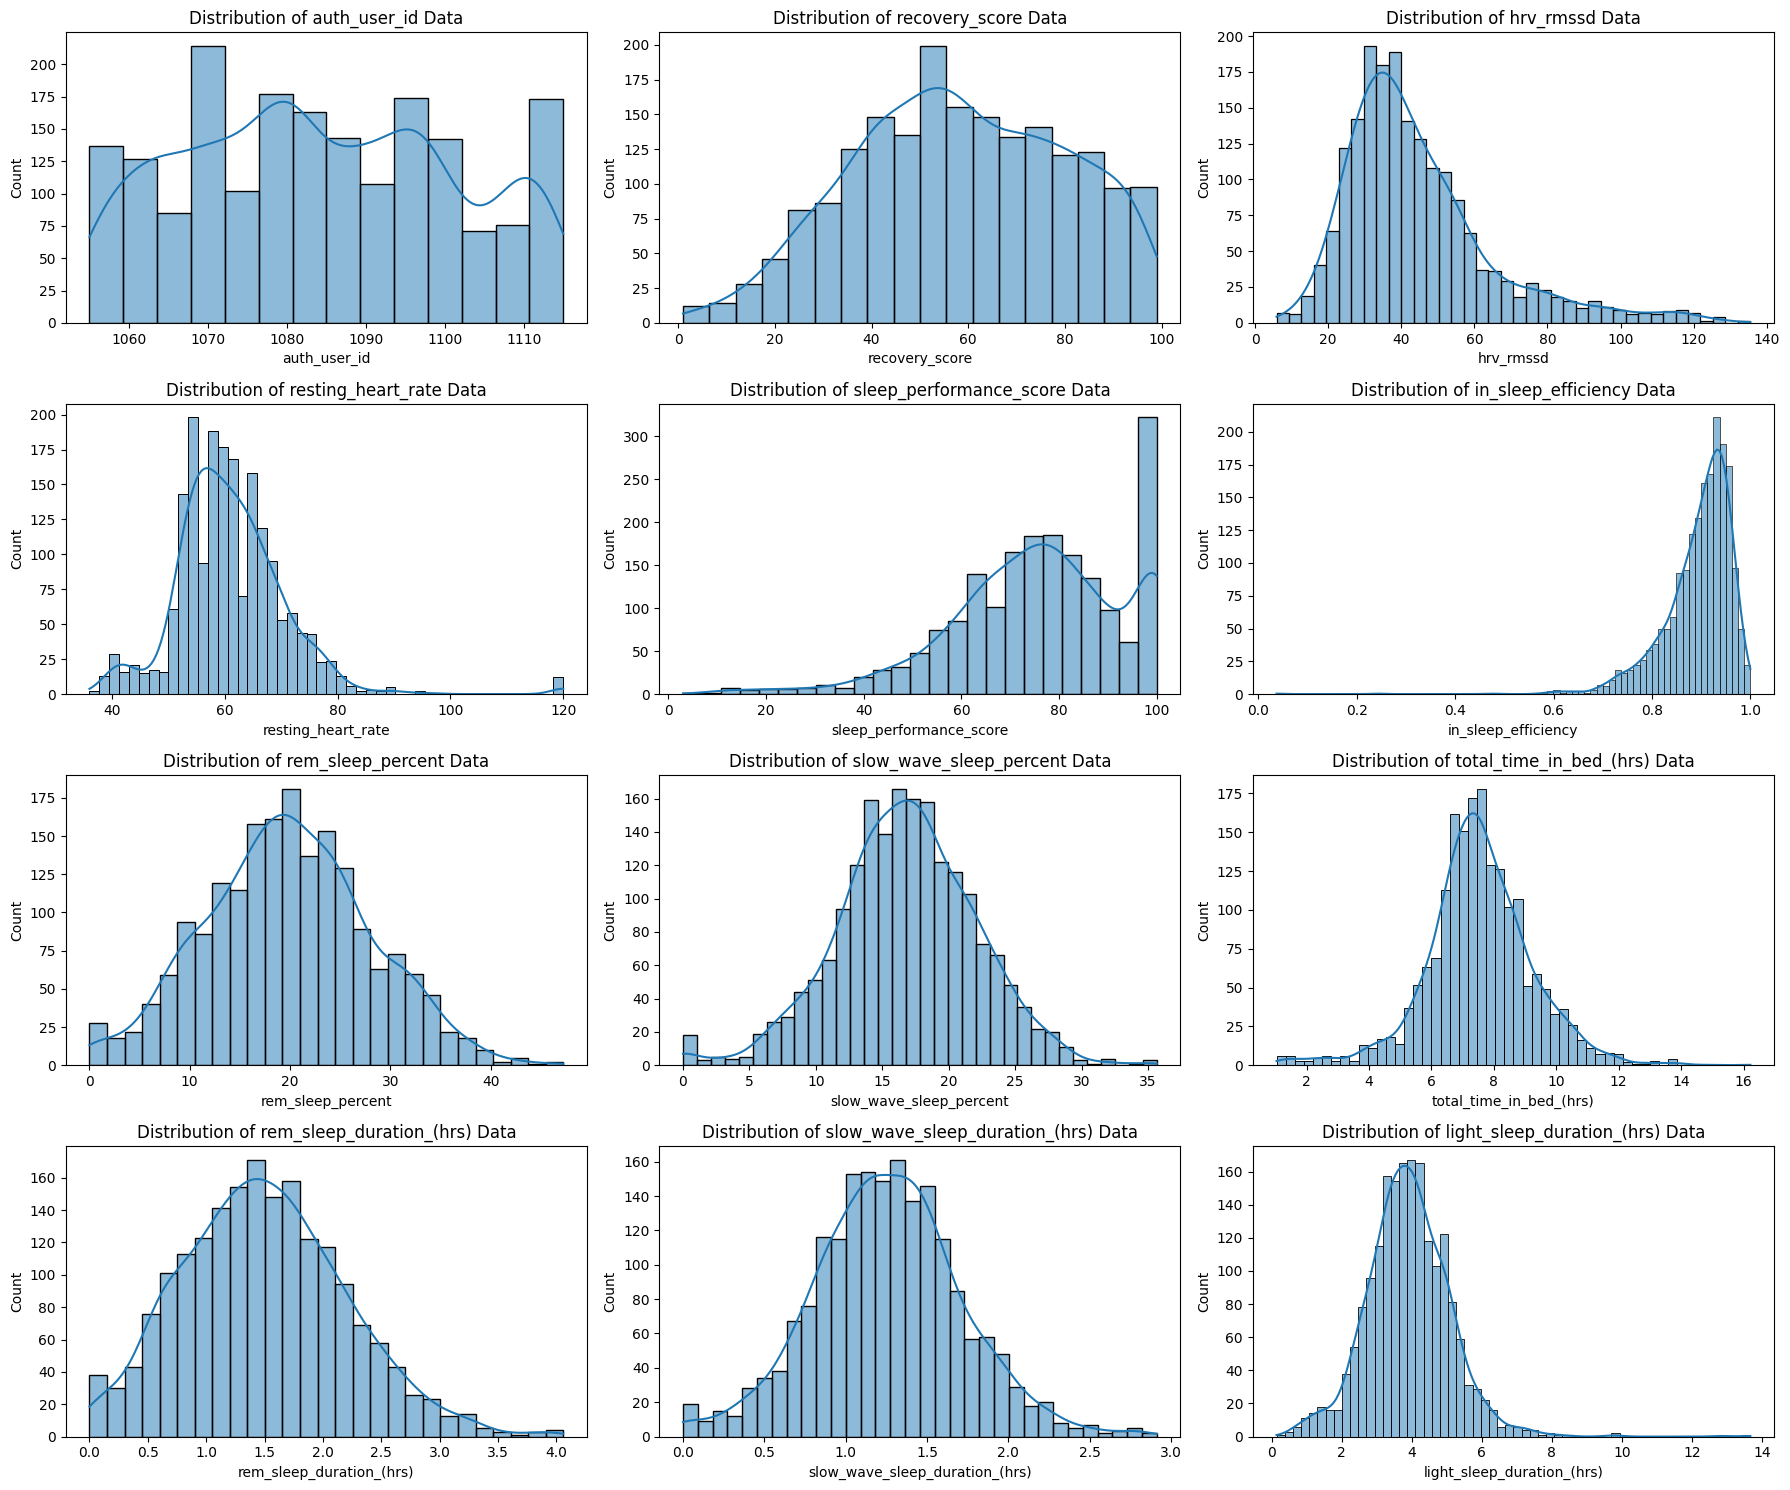

In [106]:
plot_column_distributions(a_95)

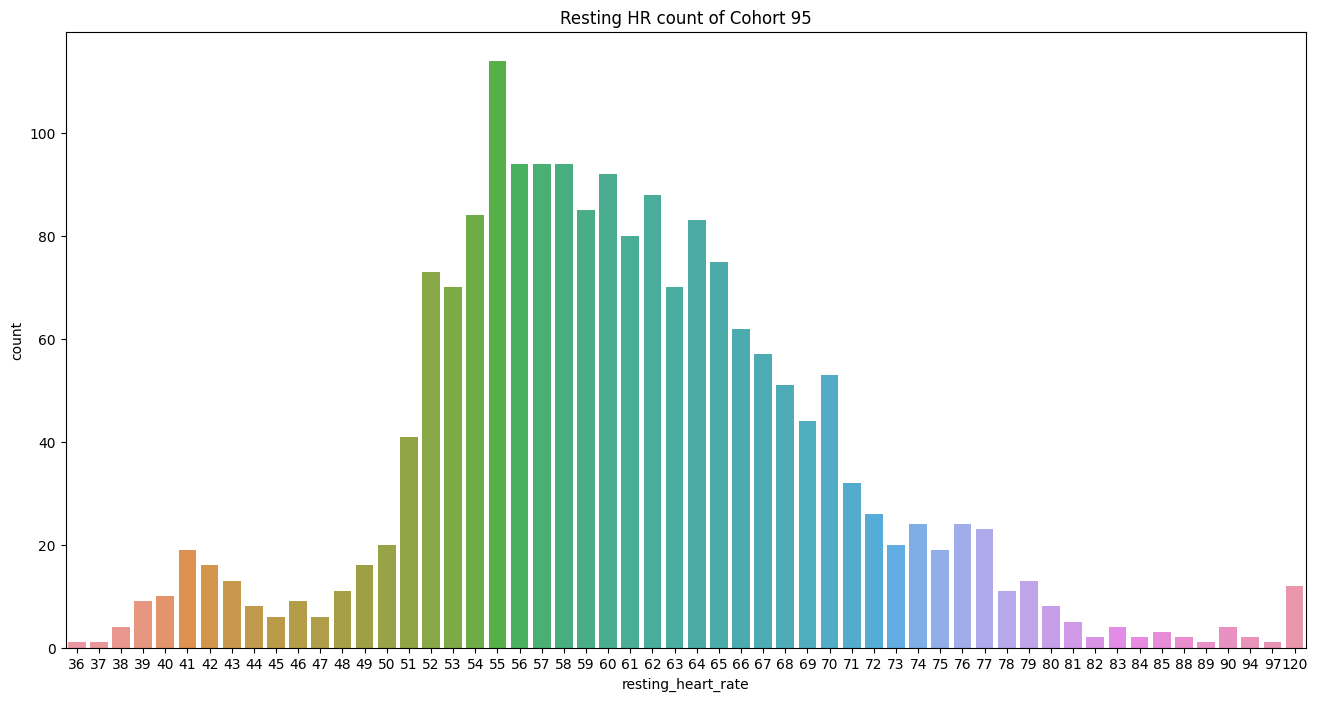

In [156]:
plt.figure(figsize=(16,8))
sns.countplot(data=a_95,x='resting_heart_rate')
plt.title('Resting HR count of Cohort 95');

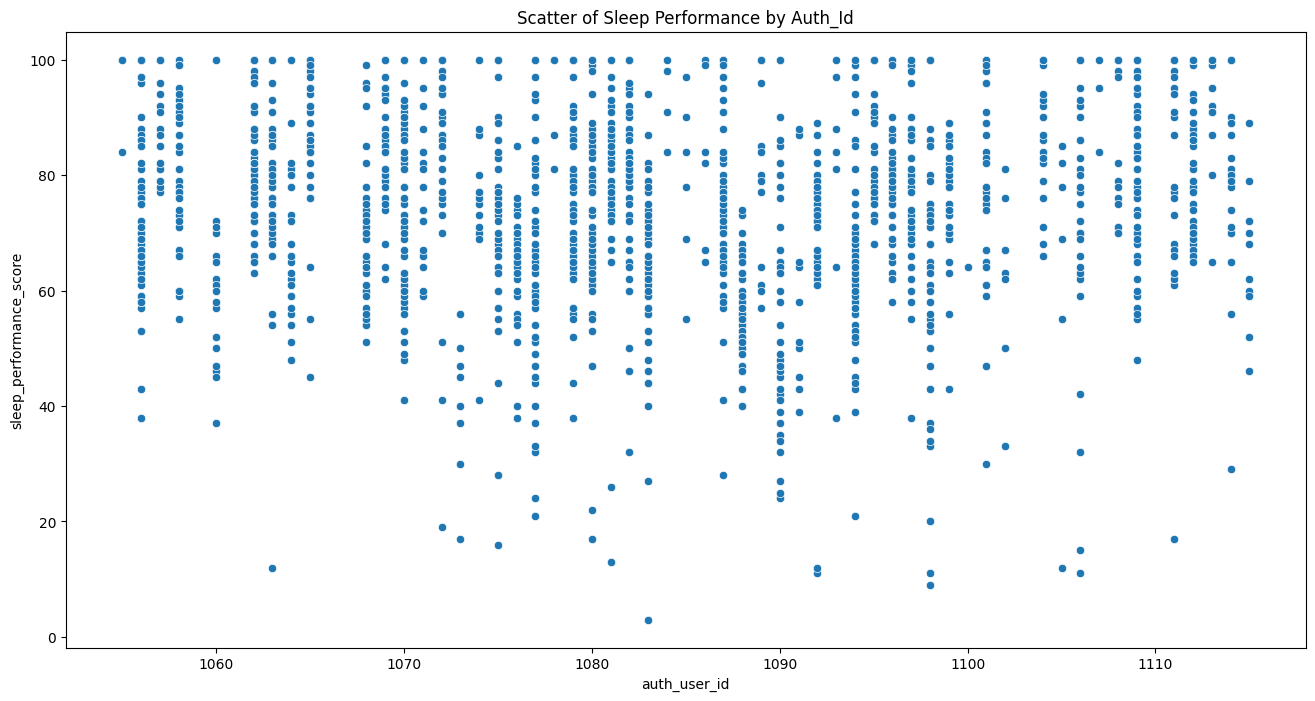

In [155]:
plt.figure(figsize=(16,8))
sns.scatterplot(data=a_95,x='auth_user_id',y='sleep_performance_score')
plt.title('Scatter of Sleep Performance by Auth_Id');

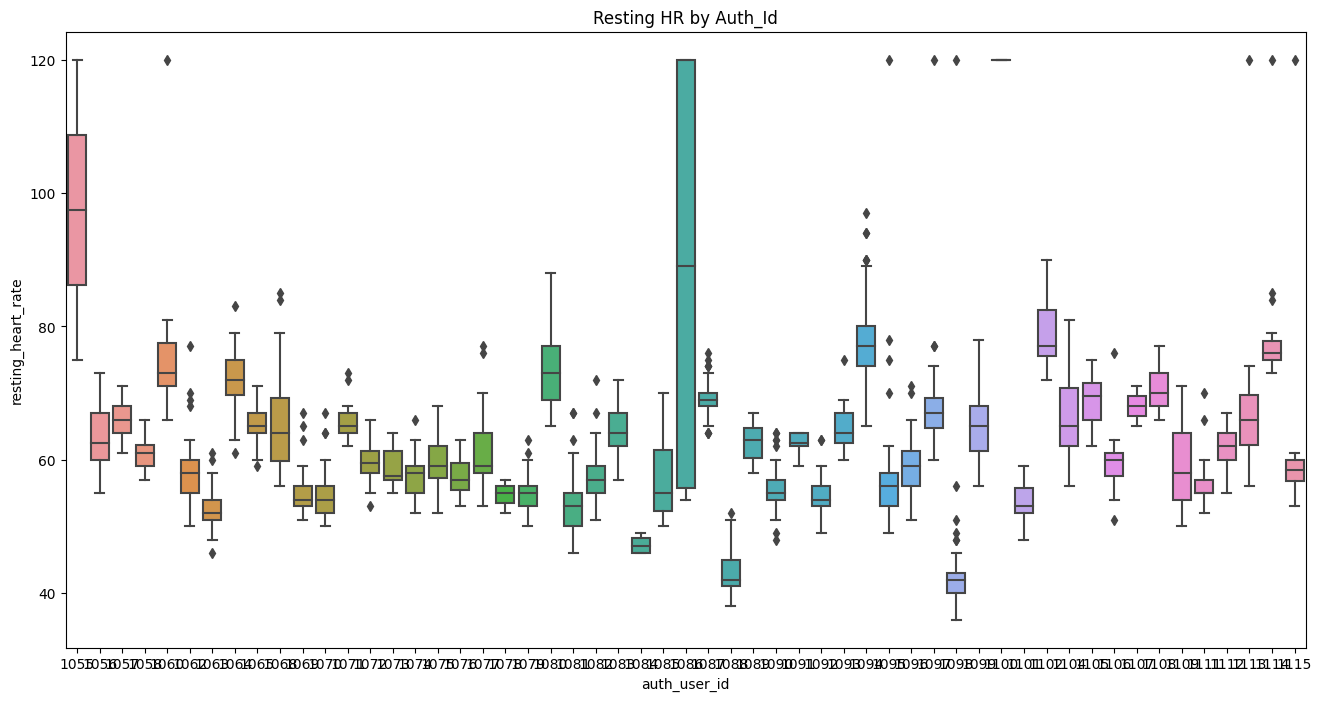

In [157]:
plt.figure(figsize=(16,8))
sns.boxplot(data=a_95,x='auth_user_id',y='resting_heart_rate')
plt.title('Resting HR by Auth_Id');

## _97:_

In [117]:
a_97.describe()

auth_user_id  recovery_score    hrv_rmssd  resting_heart_rate  \
count   1852.000000     1852.000000  1852.000000         1852.000000   
mean     850.531857       57.484341    44.545601           61.564255   
std       29.726260       22.785218    27.668812            9.625549   
min      814.000000        1.000000     9.177140           39.000000   
25%      827.000000       40.000000    25.977370           55.000000   
50%      842.000000       57.000000    36.646719           61.000000   
75%      875.000000       75.000000    52.307071           67.000000   
max      932.000000       99.000000   184.895280          120.000000   

       sleep_performance_score  in_sleep_efficiency  rem_sleep_percent  \
count              1852.000000          1852.000000        1852.000000   
mean                 77.163607             0.885141          19.069298   
std                  17.745841             0.068347           8.719903   
min                   1.000000             0.016043           0.000000   
25%                  67.000000             0.849425          12.500250   
50%                  79.000000             0.896151          18.828000   
75%                  91.000000             0.933028          25.062750   
max                 100.000000             1.000000          48.615000   

       slow_wave_sleep_percent  total_time_in_bed_(hrs)  \
count              1852.000000              1852.000000   
mean                 18.637637                 7.644793   
std                   5.111684                 1.746850   
min                   0.000000                 1.033139   
25%                  16.106750                 6.761255   
50%                  18.912500                 7.690261   
75%                  21.793250                 8.603516   
max                  34.627000                19.916667   

       rem_sleep_duration_(hrs)  slow_wave_sleep_duration_(hrs)  \
count               1852.000000                     1852.000000   
mean                   1.455656                        1.412053   
std                    0.734680                        0.452095   
min                    0.000000                        0.000000   
25%                    0.896224                        1.171164   
50%                    1.387616                        1.443903   
75%                    1.948992                        1.716630   
max                    4.171272                        2.903865   

       light_sleep_duration_(hrs)  total_time_asleep  total_restorative_sleep  \
count                 1852.000000        1852.000000              1852.000000   
mean                     3.820805           6.688514                 2.867710   
std                      1.255519           1.492188                 1.012167   
min                      0.112302           0.112302                 0.000000   
25%                      3.016148           5.975848                 2.219995   
50%                      3.753858           6.778069                 2.871771   
75%                      4.510298           7.558165                 3.505267   
max                     13.197493          13.221562                 6.360927   

       hrv_%_change  rhr_%_change  tib_%_change  tta%_change  trs%_change  
count   1614.000000   1614.000000   1614.000000  1614.000000  1614.000000  
mean       0.060203     -0.011385     -0.006850    -0.016707    -0.027063  
std        0.279274      0.094797      0.208518     0.201440     0.293214  
min       -0.725982     -0.311798     -0.871899    -0.986035    -1.000000  
25%       -0.124939     -0.058824     -0.105563    -0.113823    -0.203924  
50%        0.029610     -0.017682     -0.000528    -0.010169    -0.034103  
75%        0.213464      0.033708      0.094516     0.083780     0.141139  
max        2.378384      1.257053      1.855573     1.016638     1.430621

In [161]:
a_97.auth_user_id.nunique()

41

In [103]:
a_97.isnull().sum()

auth_user_id                        0
recovery_score                      0
hrv_rmssd                           0
resting_heart_rate                  0
sleep_performance_score             0
in_sleep_efficiency                 0
rem_sleep_percent                   0
slow_wave_sleep_percent             0
total_time_in_bed_(hrs)             0
rem_sleep_duration_(hrs)            0
slow_wave_sleep_duration_(hrs)      0
light_sleep_duration_(hrs)          0
total_time_asleep                   0
total_restorative_sleep             0
timeframe                         486
date_actual                         0
dow                                 0
hrv_%_change                      238
rhr_%_change                      238
tib_%_change                      238
tta%_change                       238
trs%_change                       238
dtype: int64

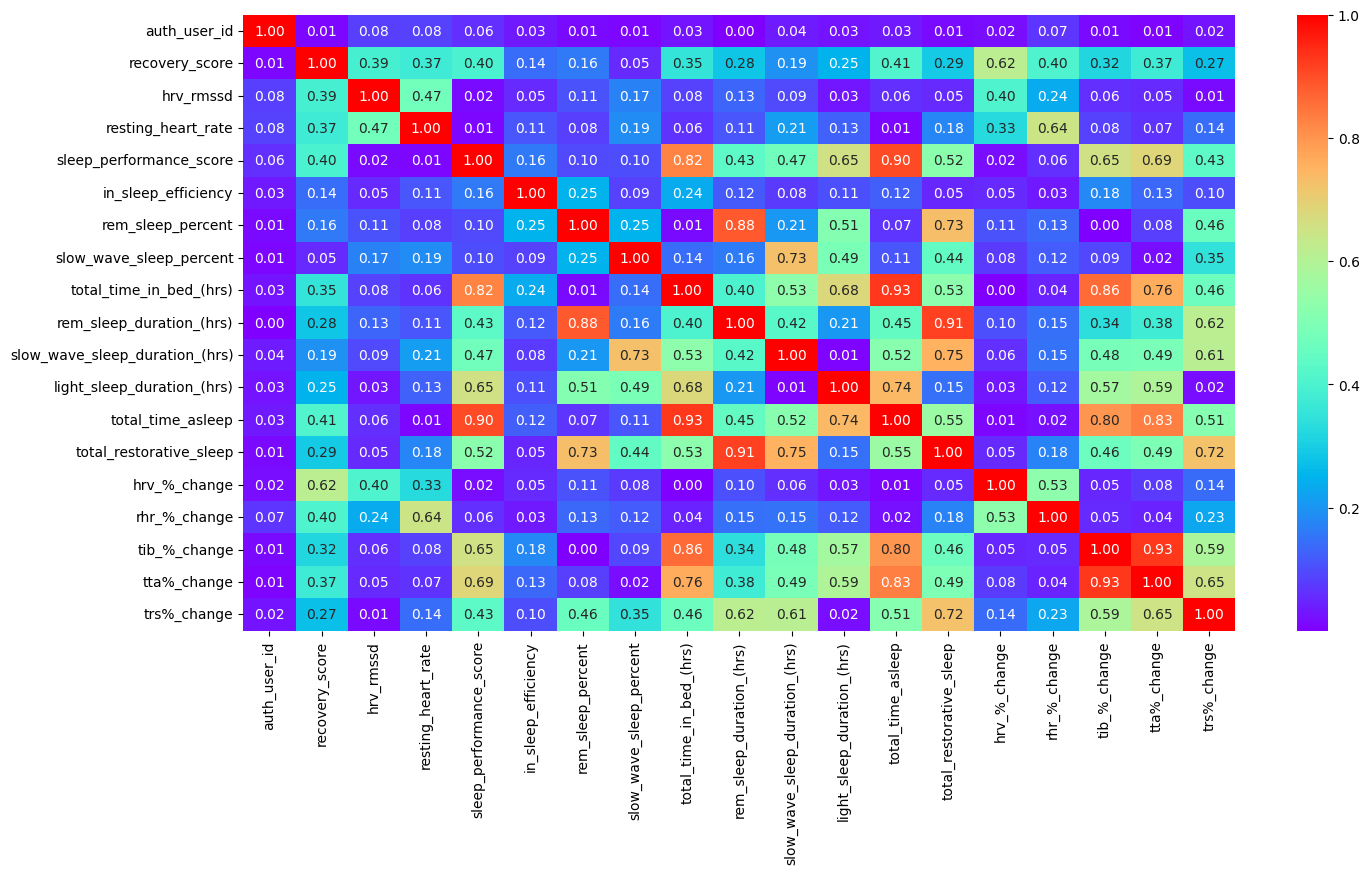

In [118]:
plt.figure(figsize=(16,8))
sns.heatmap(np.abs(a_97.corr()),annot=True,cmap='rainbow', fmt="0.2f")
plt.show()


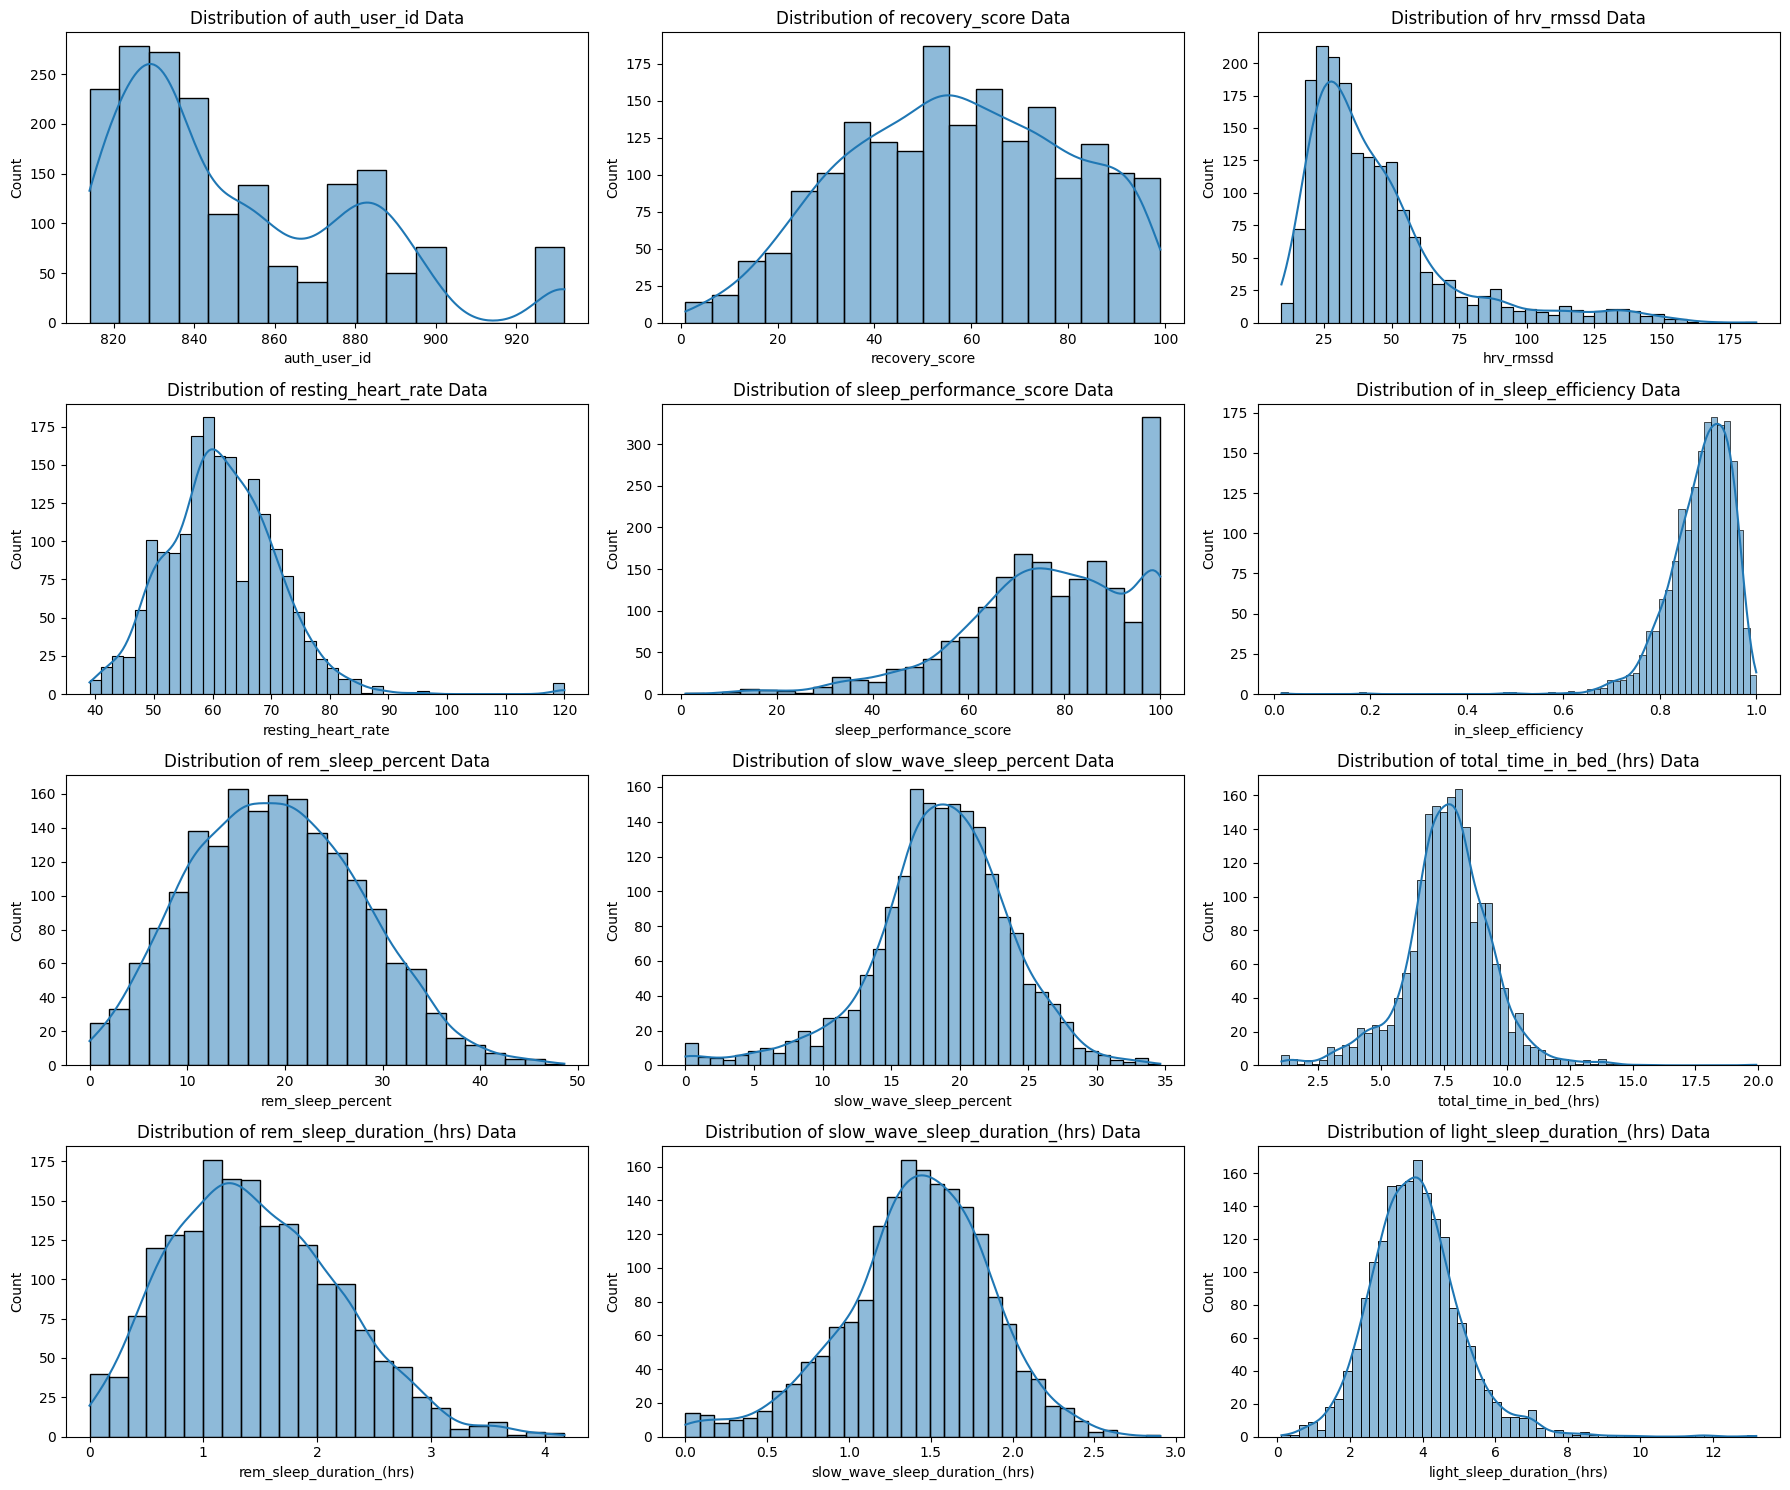

In [108]:
plot_column_distributions(a_97)

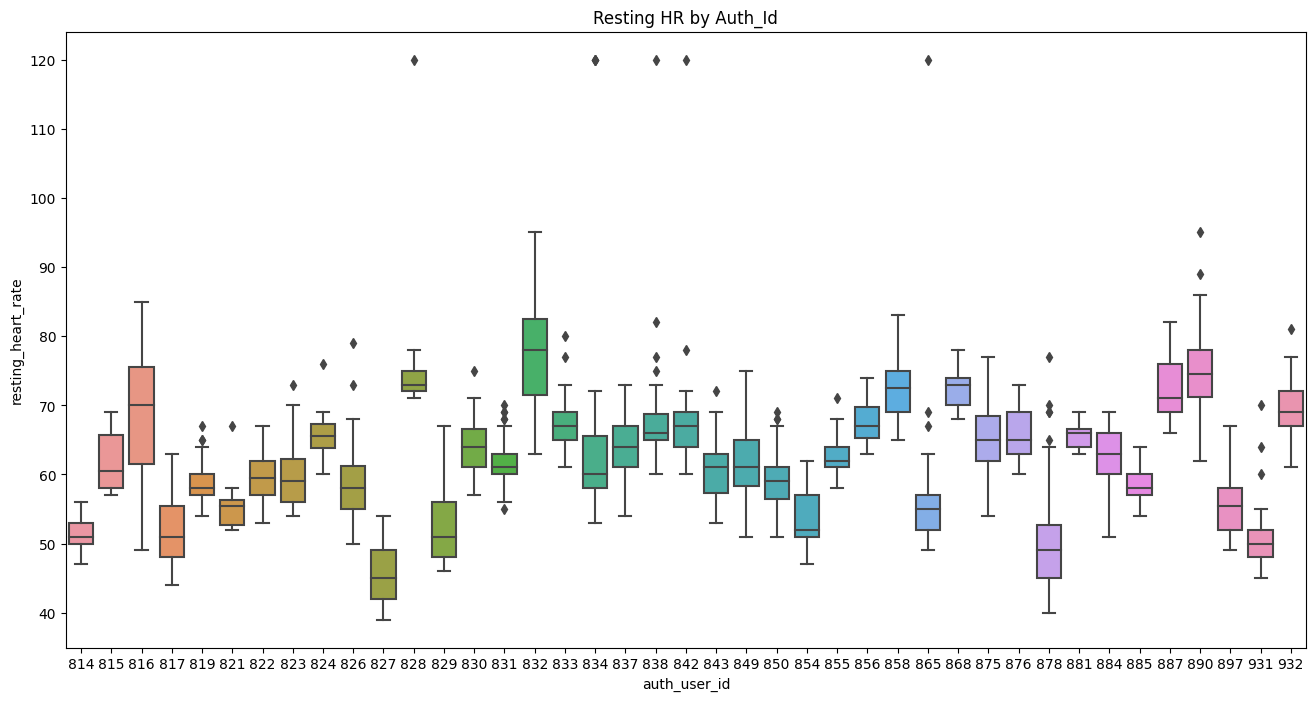

In [154]:
plt.figure(figsize=(16,8))
sns.boxplot(data=a_97,x='auth_user_id',y='resting_heart_rate')
plt.title('Resting HR by Auth_Id');

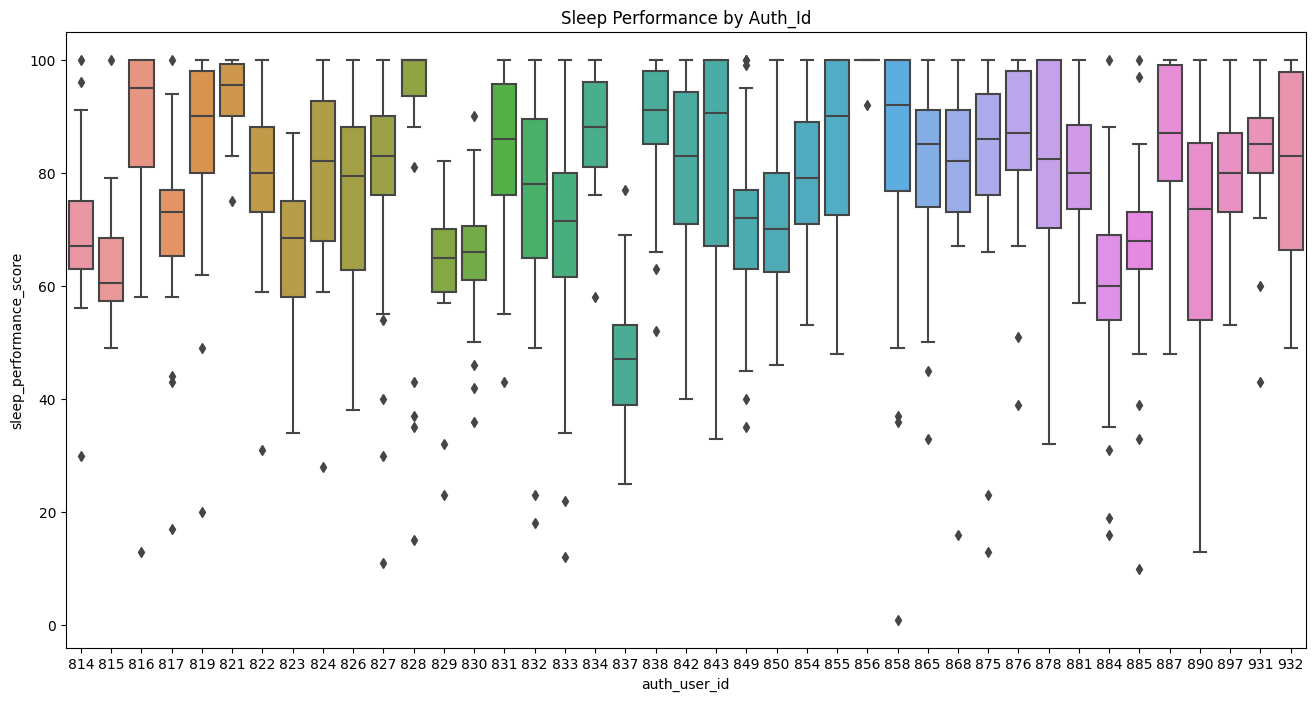

In [153]:
plt.figure(figsize=(16,8))
sns.boxplot(data=a_97,x='auth_user_id',y='sleep_performance_score')
plt.title('Sleep Performance by Auth_Id');

## _98:_

In [115]:
a_98.describe()

auth_user_id  recovery_score    hrv_rmssd  resting_heart_rate  \
count   1123.000000     1123.000000  1123.000000         1123.000000   
mean     866.447017       60.086376    43.966155           65.320570   
std       11.310620       21.833077    23.548781            7.996467   
min      840.000000        1.000000    10.352020           40.000000   
25%      860.000000       43.000000    29.792043           61.000000   
50%      867.000000       60.000000    36.865448           66.000000   
75%      872.000000       78.000000    48.155212           71.000000   
max      891.000000       99.000000   133.310850           90.000000   

       sleep_performance_score  in_sleep_efficiency  rem_sleep_percent  \
count              1123.000000          1123.000000        1123.000000   
mean                 83.508459             0.911723          22.616033   
std                  16.662281             0.054142           7.414280   
min                   6.000000             0.439123           0.000000   
25%                  73.000000             0.884995          17.462500   
50%                  87.000000             0.918627          22.222000   
75%                 100.000000             0.948529          27.613500   
max                 100.000000             1.000000          46.504000   

       slow_wave_sleep_percent  total_time_in_bed_(hrs)  \
count              1123.000000              1123.000000   
mean                 18.011896                 7.912715   
std                   4.552891                 1.894572   
min                   0.000000                 0.601031   
25%                  15.058000                 6.752969   
50%                  18.141000                 7.818652   
75%                  21.251000                 8.967971   
max                  34.691000                15.605047   

       rem_sleep_duration_(hrs)  slow_wave_sleep_duration_(hrs)  \
count               1123.000000                     1123.000000   
mean                   1.789965                        1.411189   
std                    0.720691                        0.436974   
min                    0.000000                        0.000000   
25%                    1.275301                        1.123037   
50%                    1.716370                        1.403797   
75%                    2.229890                        1.696456   
max                    5.622932                        2.767482   

       light_sleep_duration_(hrs)  total_time_asleep  total_restorative_sleep  \
count                 1123.000000        1123.000000              1123.000000   
mean                     3.949515           7.150669                 3.201154   
std                      1.219250           1.697226                 1.008998   
min                      0.393064           0.553214                 0.000000   
25%                      3.168299           6.152328                 2.510504   
50%                      3.842406           7.059073                 3.128174   
75%                      4.652301           8.164792                 3.838220   
max                      8.495011          13.420019                 8.101647   

       hrv_%_change  rhr_%_change  tib_%_change  tta%_change  trs%_change  
count   1123.000000   1123.000000   1123.000000  1123.000000  1123.000000  
mean       0.014306      0.002291     -0.036877    -0.027961    -0.013750  
std        0.251406      0.078859      0.224972     0.227528     0.295338  
min       -0.805839     -0.233449     -0.918691    -0.915696    -1.000000  
25%       -0.144492     -0.042216     -0.174189    -0.173241    -0.203795  
50%        0.017487     -0.001637     -0.049594    -0.031324    -0.031383  
75%        0.152122      0.044855      0.099817     0.112205     0.158989  
max        1.768586      0.397671      0.809864     0.926536     1.322563

In [160]:
a_98.auth_user_id.nunique()

16

In [104]:
a_98.isnull().sum()

auth_user_id                        0
recovery_score                      0
hrv_rmssd                           0
resting_heart_rate                  0
sleep_performance_score             0
in_sleep_efficiency                 0
rem_sleep_percent                   0
slow_wave_sleep_percent             0
total_time_in_bed_(hrs)             0
rem_sleep_duration_(hrs)            0
slow_wave_sleep_duration_(hrs)      0
light_sleep_duration_(hrs)          0
total_time_asleep                   0
total_restorative_sleep             0
timeframe                         258
date_actual                         0
dow                                 0
hrv_%_change                        0
rhr_%_change                        0
tib_%_change                        0
tta%_change                         0
trs%_change                         0
dtype: int64

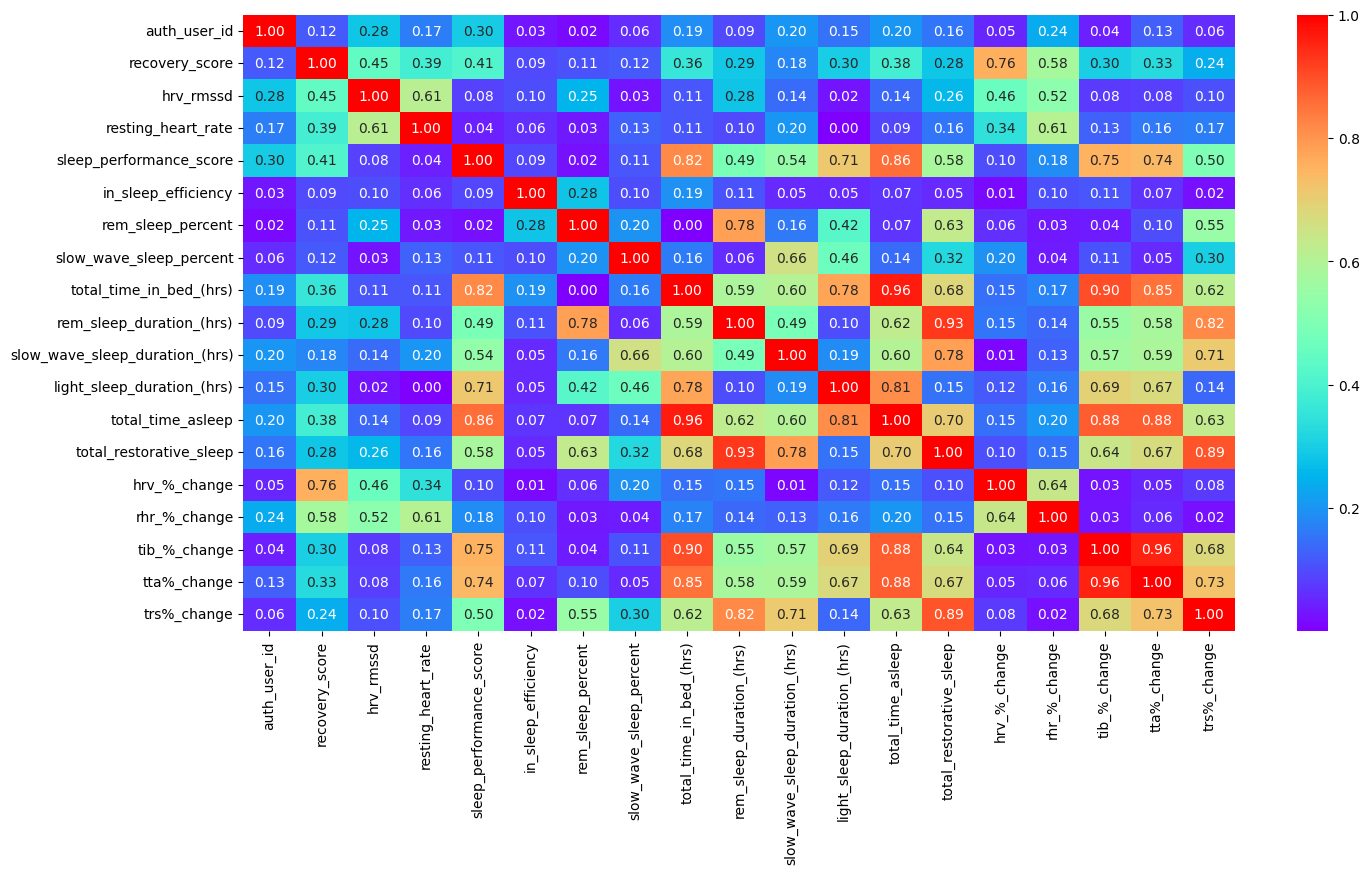

In [116]:
plt.figure(figsize=(16,8))
sns.heatmap(np.abs(a_98.corr()),annot=True,cmap='rainbow', fmt="0.2f")
plt.show()


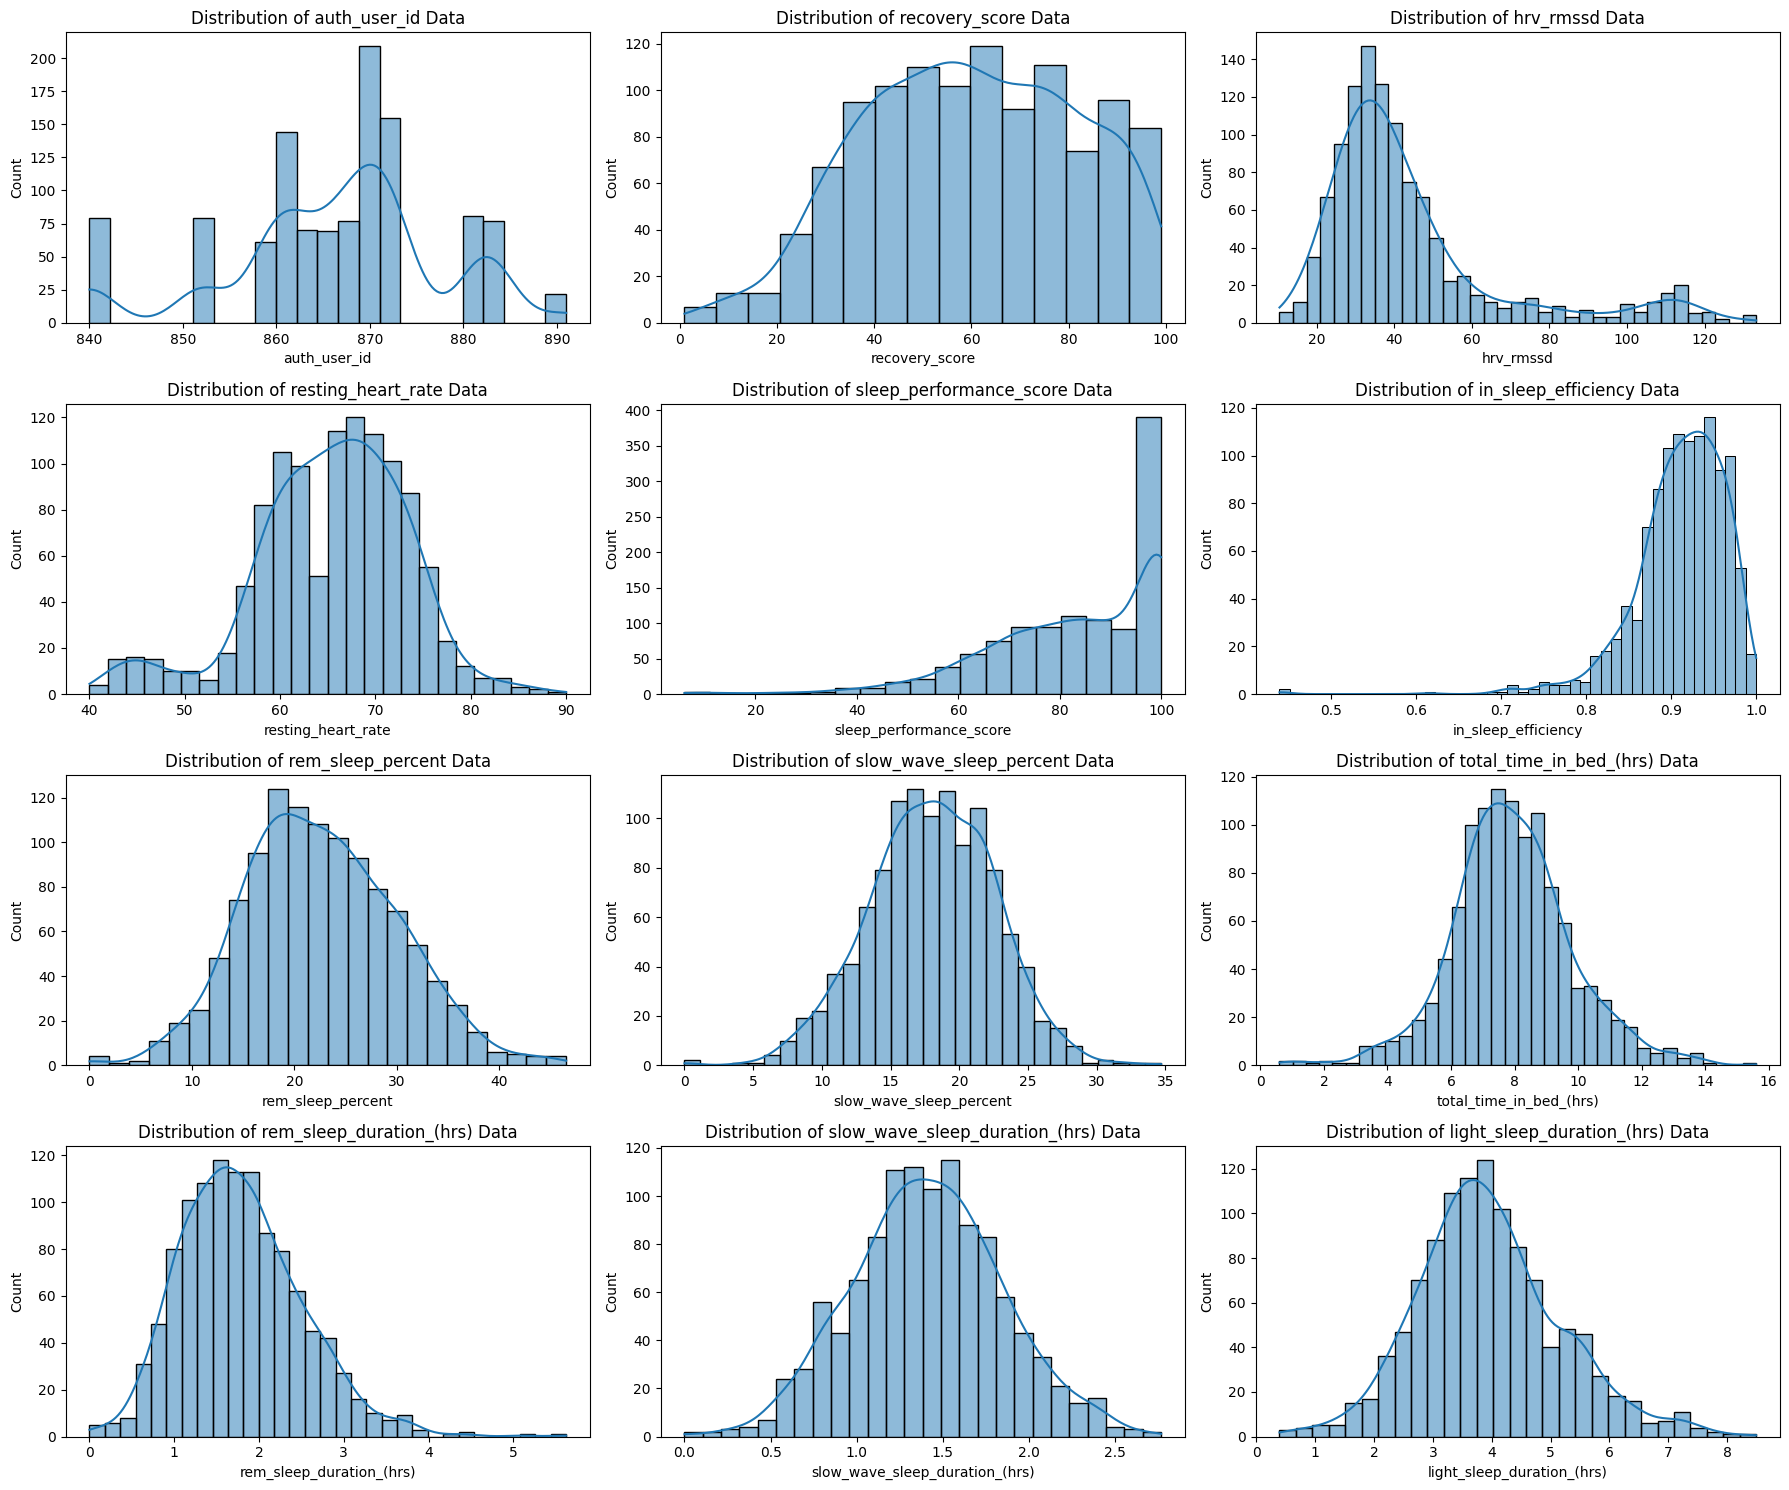

In [109]:
plot_column_distributions(a_98)

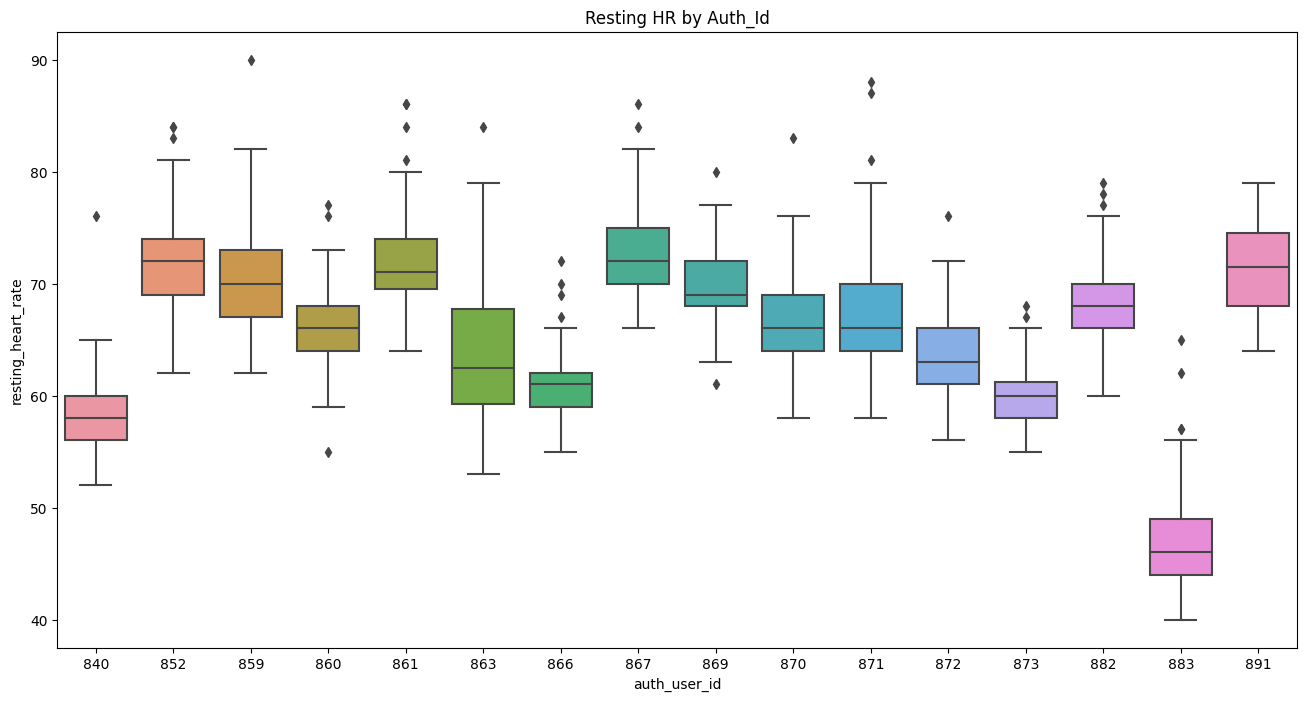

In [152]:
plt.figure(figsize=(16,8))
sns.boxplot(data=a_98,x='auth_user_id',y='resting_heart_rate')
plt.title('Resting HR by Auth_Id');

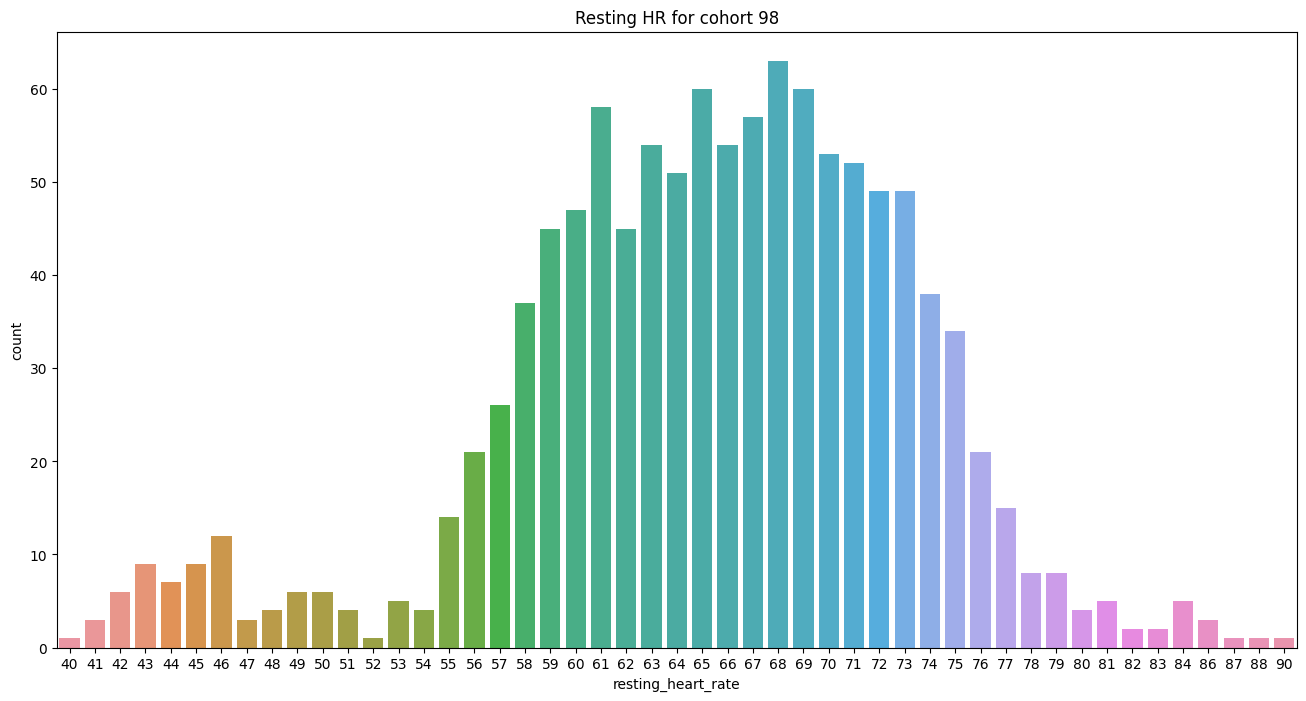

In [163]:
plt.figure(figsize=(16,8))
sns.countplot(data=a_98,x='resting_heart_rate')
plt.title('Resting HR for cohort 98');

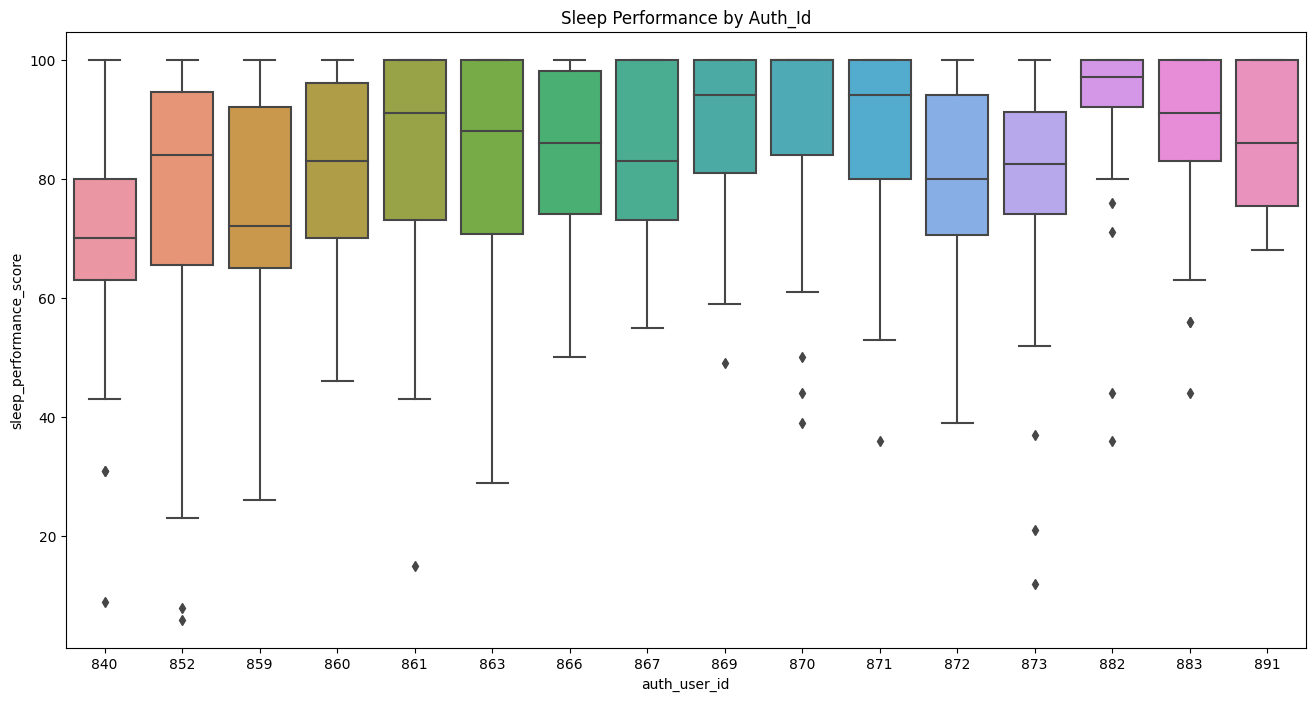

In [151]:
plt.figure(figsize=(16,8))
sns.boxplot(data=a_98,x='auth_user_id',y='sleep_performance_score')
plt.title('Sleep Performance by Auth_Id');

## _99:_

In [121]:
a_99.describe()

auth_user_id  recovery_score   hrv_rmssd  resting_heart_rate  \
count    572.000000      572.000000  572.000000          572.000000   
mean    1177.330420       56.627622   38.606586           62.954545   
std        7.289912       22.113926   15.634105           10.690915   
min     1167.000000        1.000000   11.024408           42.000000   
25%     1172.000000       40.000000   26.623397           57.000000   
50%     1177.000000       56.000000   35.737007           63.000000   
75%     1181.000000       74.000000   48.094945           69.000000   
max     1192.000000       98.000000  118.101250          120.000000   

       sleep_performance_score  in_sleep_efficiency  rem_sleep_percent  \
count                572.00000           572.000000         572.000000   
mean                  75.25000             0.902463          22.069858   
std                   19.18174             0.068911           8.513450   
min                   14.00000             0.314269           0.000000   
25%                   61.00000             0.876237          16.237500   
50%                   77.00000             0.919537          22.850000   
75%                   91.00000             0.945450          27.975000   
max                  100.00000             1.000000          47.938000   

       slow_wave_sleep_percent  total_time_in_bed_(hrs)  \
count               572.000000               572.000000   
mean                 18.612481                 7.193189   
std                   5.337082                 1.757796   
min                   0.000000                 1.017128   
25%                  15.510500                 6.214297   
50%                  18.784000                 7.190218   
75%                  22.174750                 8.206972   
max                  33.442000                14.823144   

       rem_sleep_duration_(hrs)  slow_wave_sleep_duration_(hrs)  \
count                572.000000                      572.000000   
mean                   1.570225                        1.327158   
std                    0.663460                        0.467453   
min                    0.000000                        0.000000   
25%                    1.121034                        1.042818   
50%                    1.608206                        1.339625   
75%                    2.013710                        1.622394   
max                    3.818069                        2.839681   

       light_sleep_duration_(hrs)  total_time_asleep  total_restorative_sleep  \
count                  572.000000         572.000000               572.000000   
mean                     3.541701           6.439084                 2.897383   
std                      1.440474           1.636548                 0.988387   
min                      0.609364           0.970326                 0.000000   
25%                      2.671145           5.476108                 2.286110   
50%                      3.352903           6.493314                 2.968039   
75%                      4.275267           7.435781                 3.541579   
max                     14.149353          14.277966                 5.294077   

       hrv_%_change  rhr_%_change  tib_%_change  tta%_change  trs%_change  
count    571.000000    571.000000    571.000000   571.000000   571.000000  
mean       0.035136     -0.015127      0.000661     0.003649     0.002670  
std        0.299800      0.104314      0.237778     0.241628     0.316588  
min       -0.654650     -0.236230     -0.862741    -0.870877    -1.000000  
25%       -0.118607     -0.073309     -0.125851    -0.124697    -0.169277  
50%        0.005664     -0.028825     -0.000632     0.001249     0.012618  
75%        0.128460      0.024259      0.122898     0.138777     0.173304  
max        2.217297      0.753959      0.938387     0.930856     1.269915

In [105]:
a_99.isnull().sum()

auth_user_id                        0
recovery_score                      0
hrv_rmssd                           0
resting_heart_rate                  0
sleep_performance_score             0
in_sleep_efficiency                 0
rem_sleep_percent                   0
slow_wave_sleep_percent             0
total_time_in_bed_(hrs)             0
rem_sleep_duration_(hrs)            0
slow_wave_sleep_duration_(hrs)      0
light_sleep_duration_(hrs)          0
total_time_asleep                   0
total_restorative_sleep             0
timeframe                         206
date_actual                         0
dow                                 0
hrv_%_change                        1
rhr_%_change                        1
tib_%_change                        1
tta%_change                         1
trs%_change                         1
dtype: int64

In [159]:
a_99.auth_user_id.nunique()

18

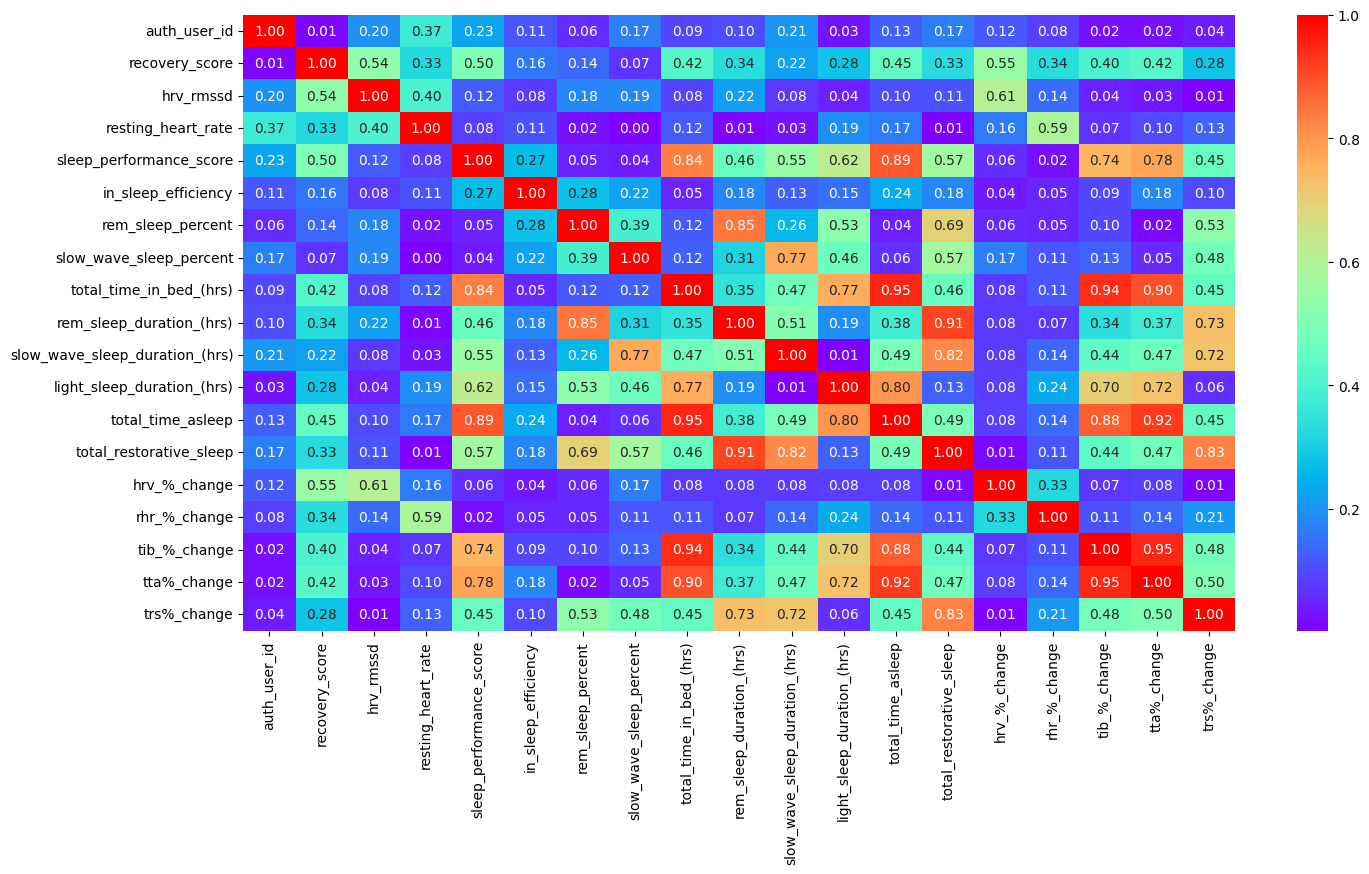

In [110]:
plt.figure(figsize=(16,8))
sns.heatmap(np.abs(a_99.corr()),annot=True,cmap='rainbow', fmt="0.2f")
plt.show()


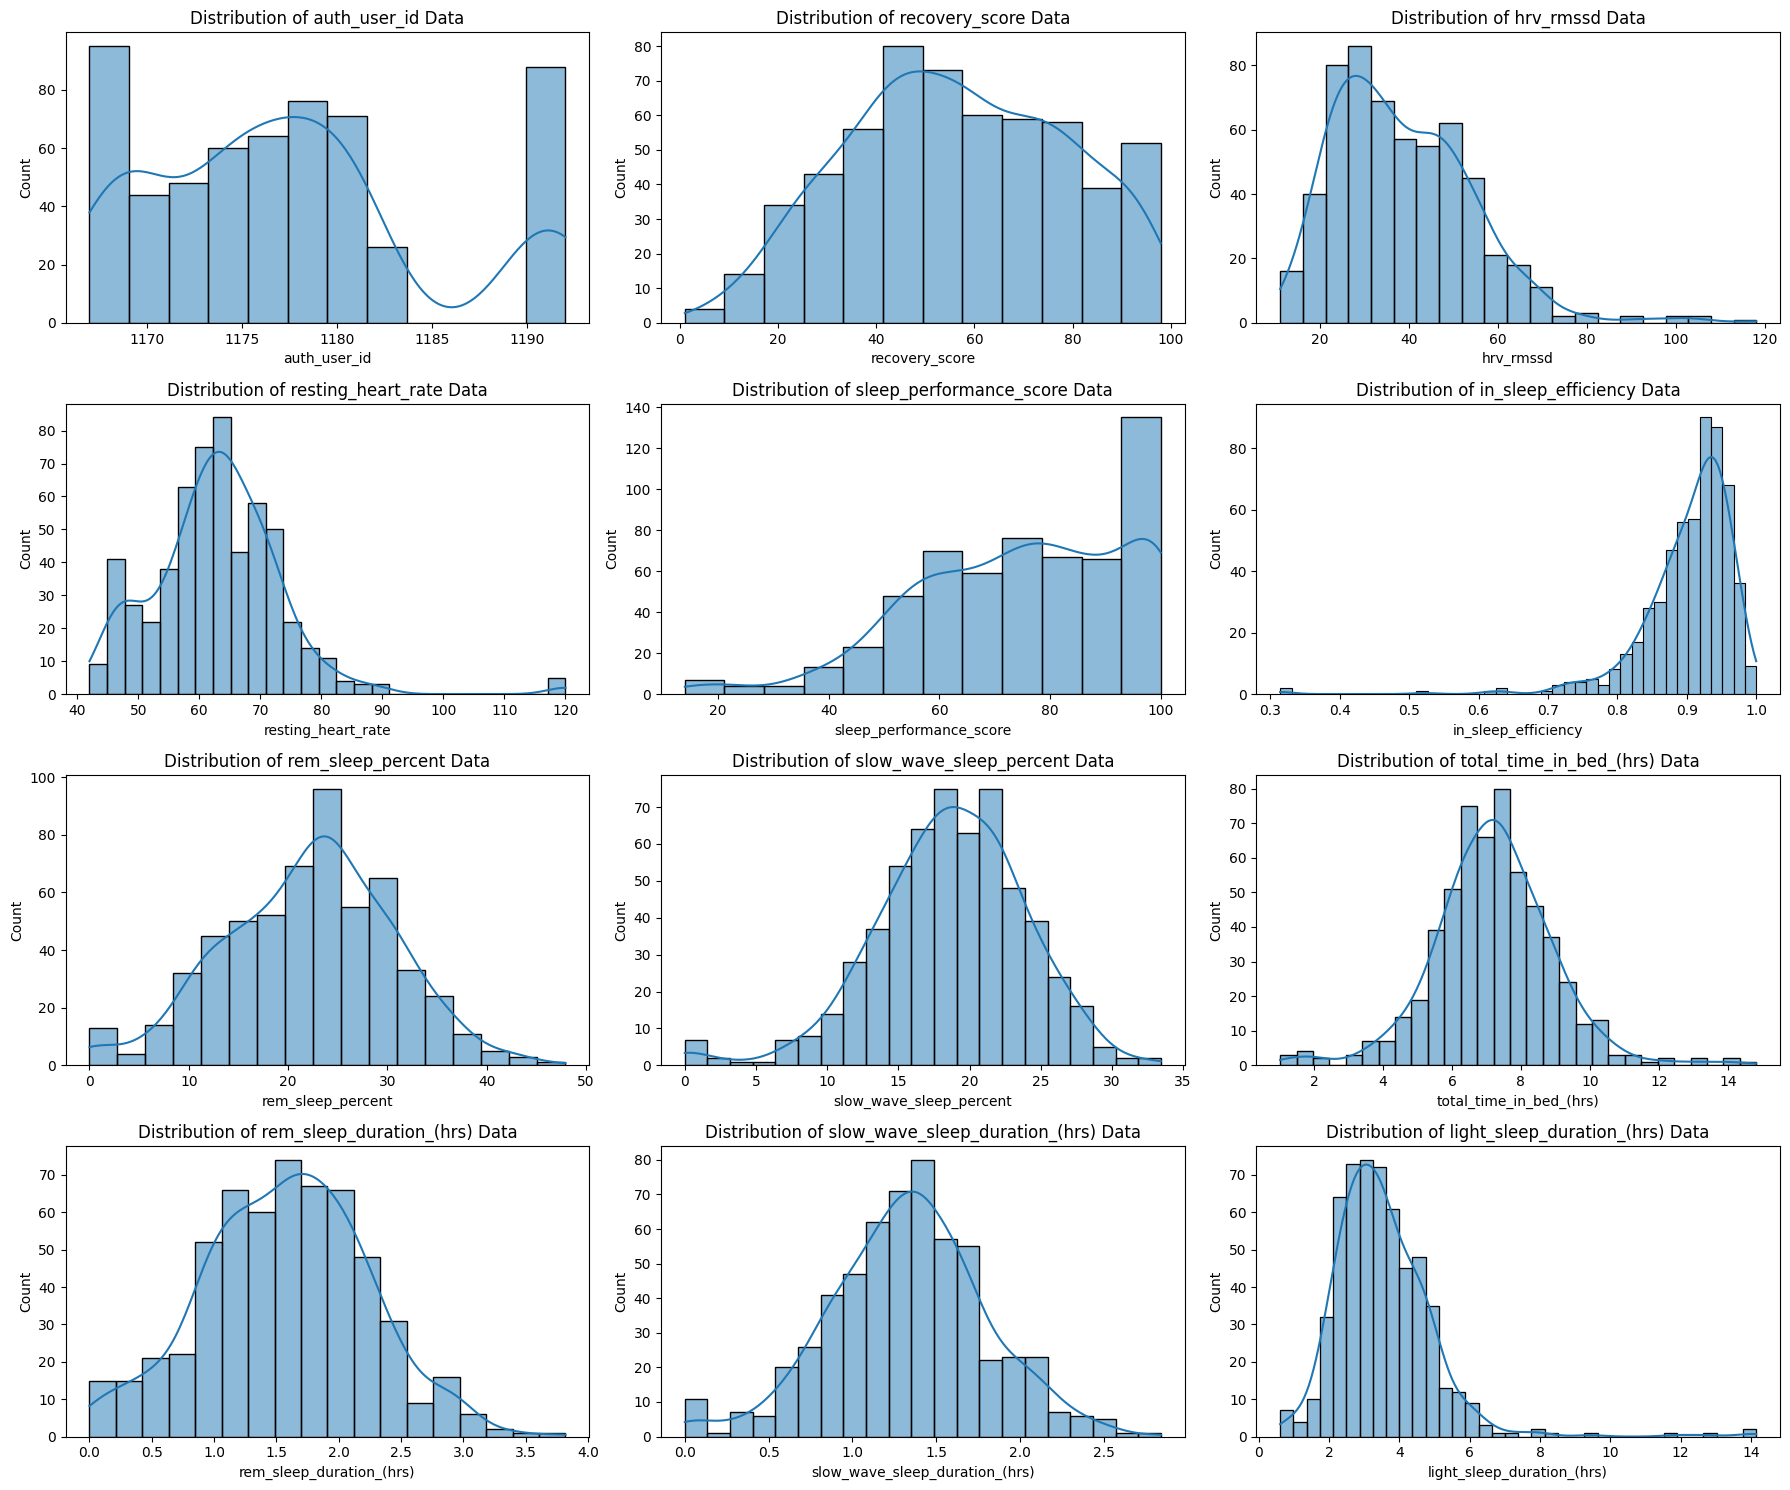

In [111]:
plot_column_distributions(a_99)

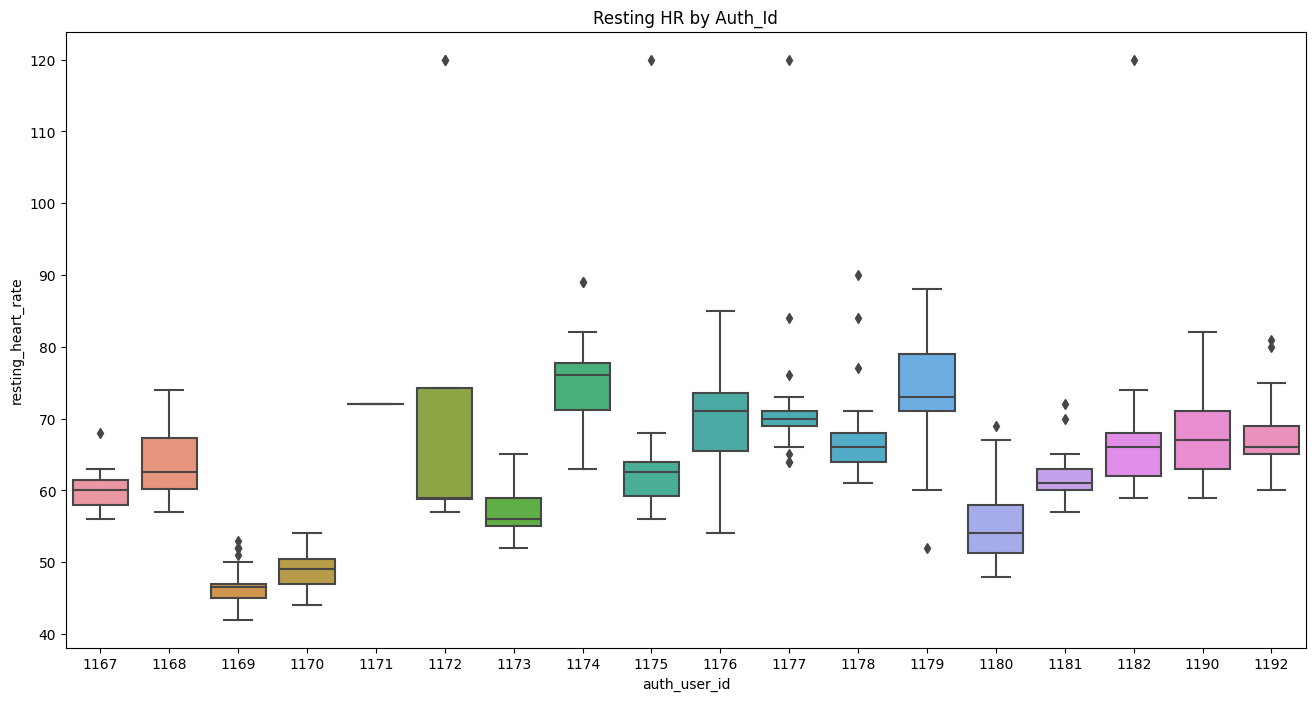

In [150]:
plt.figure(figsize=(16,8))
sns.boxplot(data=a_99,x='auth_user_id',y='resting_heart_rate')
plt.title('Resting HR by Auth_Id');

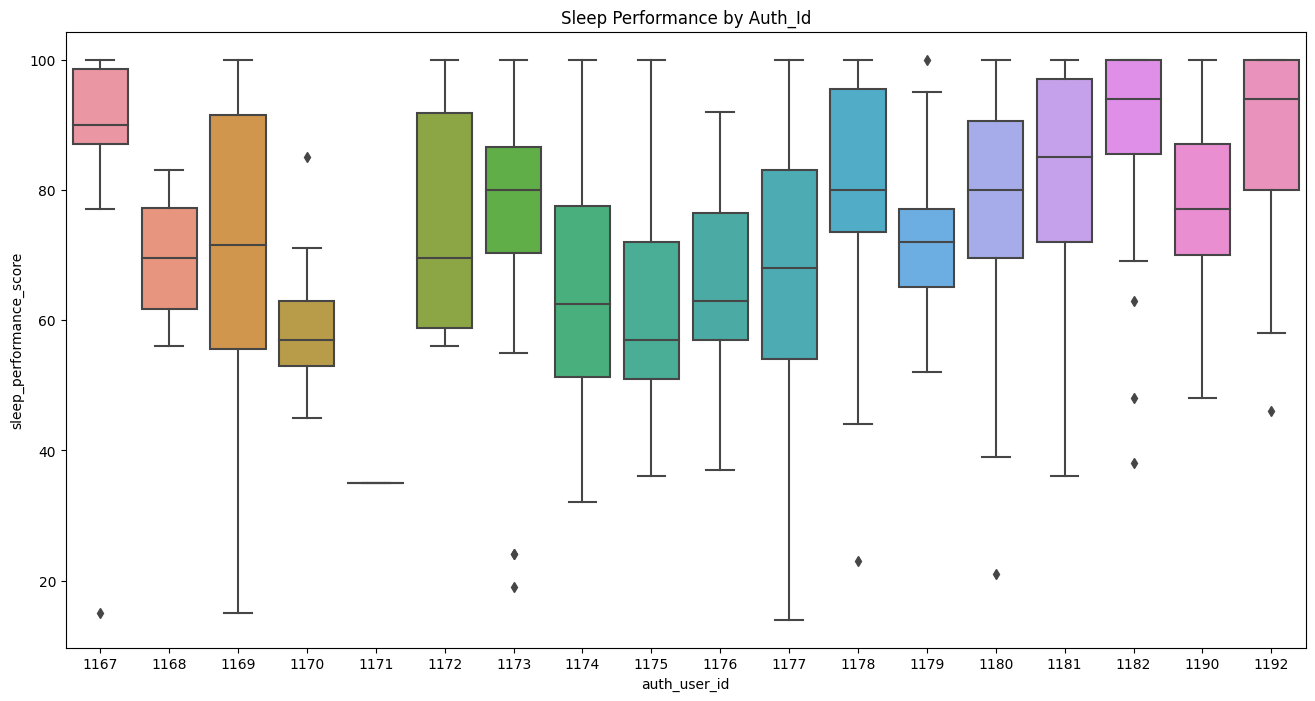

In [149]:
plt.figure(figsize=(16,8))
sns.boxplot(data=a_99,x='auth_user_id',y='sleep_performance_score')
plt.title('Sleep Performance by Auth_Id');